In [5]:
import deeplabcut
import os
from deeplabcut.utils.auxfun_videos import VideoWriter

# Resize video file

In [2]:

# video_path = r"C:\Users\PC5\Downloads\00f4af0cf0a43159.MOV"
# filename = os.path.basename(video_path)
# _, ext = os.path.splitext(video_path)

# print(f"modifying video: {video_path} to {filename.replace(ext, '_short'+ext)}")

# vid = VideoWriter(video_path)
# # clips = vid.split(n_splits=10)

# vid.shorten(start="00:00:00", end="00:02:10", dest_folder = './', suffix='_short')
# shorten_video_path = os.path.join('./', filename.replace(ext, '_short'+ext))
# vid = VideoWriter(shorten_video_path)
# vid.rescale(width=640)

# # ffmpeg -i "path_to_video" -c:v h264 -crf 18 -preset fast "output_path"

modifying video: C:\Users\PC5\Downloads\00f4af0cf0a43159.MOV to 00f4af0cf0a43159_short.MOV


'.\\00f4af0cf0a43159_shortrescale.MOV'

In [2]:
deeplabcut.create_new_project('p95', '5013f3', ['C:/Users/mice/Desktop/m/dataset/5013f36aa09d6150_scaled.MOV'], working_directory='./', copy_videos=True, multianimal=False)

Created "C:\Users\mice\Desktop\m\p95-5013f3-2024-06-20\videos"
Created "C:\Users\mice\Desktop\m\p95-5013f3-2024-06-20\labeled-data"
Created "C:\Users\mice\Desktop\m\p95-5013f3-2024-06-20\training-datasets"
Created "C:\Users\mice\Desktop\m\p95-5013f3-2024-06-20\dlc-models"
Copying the videos
C:\Users\mice\Desktop\m\p95-5013f3-2024-06-20\videos\5013f36aa09d6150_scaled.MOV
Generated "C:\Users\mice\Desktop\m\p95-5013f3-2024-06-20\config.yaml"

A new project with name p95-5013f3-2024-06-20 is created at C:\Users\mice\Desktop\m and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_videos' to add new videos to your project (at any stage).


'C:\\Users\\mice\\Desktop\\m\\p95-5013f3-2024-06-20\\config.yaml'

In [6]:
config_path = r'D:\Sang\y79-e8c66d-2024-06-20\config.yaml'

In [4]:
deeplabcut.extract_frames(config_path, mode='automatic', algo='kmeans', crop=False, userfeedback=False, cluster_step = 1)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 893.99  seconds.
Extracting and downsampling... 214558  frames from the video.


214558it [05:58, 598.42it/s]


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


# Go to label

In [7]:
deeplabcut.check_labels(config_path, visualizeindividuals=True)

Creating images with labels by e8c66d.


100%|██████████| 20/20 [00:02<00:00,  7.70it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [8]:
superanimal_name = 'superanimal_quadruped'
superanimal_transfer_learning=True
net_type = 'mobilenet_v2_1.0'
deeplabcut.create_training_dataset(
    config_path, augmenter_type='imgaug', 
    net_type = net_type)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([18,  1, 19,  8, 10, 17,  6, 13,  4,  2,  5, 14,  9,  7, 16, 11,  3,
           0, 15]),
   array([12])))]

In [10]:
# import scipy.io

# # Define the path to your .mat file
# mat_file_path = r'D:\Dream\deeplab\test-test-2024-06-13\training-datasets\iteration-0\UnaugmentedDataSet_testJun13\test_test95shuffle1.mat'

# # Load the .mat file
# mat_data = scipy.io.loadmat(mat_file_path)
# len(mat_data['dataset'][0])


17

In [9]:
deeplabcut.train_network(config_path, displayiters=1000, saveiters=1000, maxiters=10000)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6]],
 'all_joints_names': ['pellet',
                      'nosetip',
                      'right finger',
                      'right palm',
                      'right thumb',
                      'right elbow',
                      'left finger'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_y79Jun20\\y79_e8c66d95shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_wei

Selecting single-animal trainer
Batch Size is 1


c:\Users\mice\.conda\envs\deeplabcut\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained mobilenet_v2_1.0
Max_iters overwritten as 10000
Display_iters overwritten as 1000
Save_iters overwritten as 1000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'D:\\Sang\\y79-e8c66d-2024-06-20\\dlc-models\\iteration-0\\y79Jun20-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1

iteration: 1000 loss: 0.0491 lr: 0.005
iteration: 2000 loss: 0.0230 lr: 0.005
iteration: 3000 loss: 0.0199 lr: 0.005
iteration: 4000 loss: 0.0174 lr: 0.005
iteration: 5000 loss: 0.0159 lr: 0.005
iteration: 6000 loss: 0.0150 lr: 0.005
iteration: 7000 loss: 0.0138 lr: 0.005
iteration: 8000 loss: 0.0129 lr: 0.005
iteration: 9000 loss: 0.0111 lr: 0.005
iteration: 10000 loss: 0.0102 lr: 0.005
Exception in thread Thread-6 (load_and_enqueue):
Traceback (most recent call last):
  File "c:\Users\mice\.conda\envs\deeplabcut\lib\site-packages\tensorflow\python\client\session.py", line 1378, in _do_call
    return fn(*args)
  File "c:\Users\mice\.conda\envs\deeplabcut\lib\site-packages\tensorflow\python\client\session.py", line 1361, in _run_fn
    return self._call_tf_sessionrun(options, feed_dict, fetch_list,
  File "c:\Users\mice\.conda\envs\deeplabcut\lib\site-packages\tensorflow\python\client\session.py", line 1454, in _call_tf_sessionrun
    return tf_session.TF_SessionRun_wrapper(self._sess

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['bodypart1', 'bodypart2', 'objectA'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_testJun13\\test_test95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'c:\\Users\\PC5\\miniconda3\\envs\\dream-dl-labcut\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\mobilenet_v2_1.0_224.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'mobilenet_v2_1.0',
 'num_joints': 3,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shuffle': 

Running  DLC_mobnet_100_testJun13shuffle1_10000  with # of training iterations: 10000
Running evaluation ...


18it [00:00, 35.68it/s]
c:\Users\PC5\miniconda3\envs\dream-dl-labcut\lib\site-packages\deeplabcut\pose_estimation_tensorflow\core\evaluate.py:930: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  DataMachine.to_hdf(resultsfilename, "df_with_missing")


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-10000
Results for 10000  training iterations: 95 1 train error: 3.71 pixels. Test error: 17.45  pixels.
With pcutoff of 0.6  train error: 3.72 pixels. Test error: 5.3 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


  0%|          | 0/18 [00:00<?, ?it/s]c:\Users\PC5\miniconda3\envs\dream-dl-labcut\lib\site-packages\deeplabcut\utils\visualization.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DataCombined[loopscorer][bp]["y"][imagenr]
c:\Users\PC5\miniconda3\envs\dream-dl-labcut\lib\site-packages\deeplabcut\utils\visualization.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + DataCombined[loopscorer][bp]["x"][imagenr]
c:\Users\PC5\miniconda3\envs\dream-dl-labcut\lib\site-packages\deeplabcut\utils\visualization.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


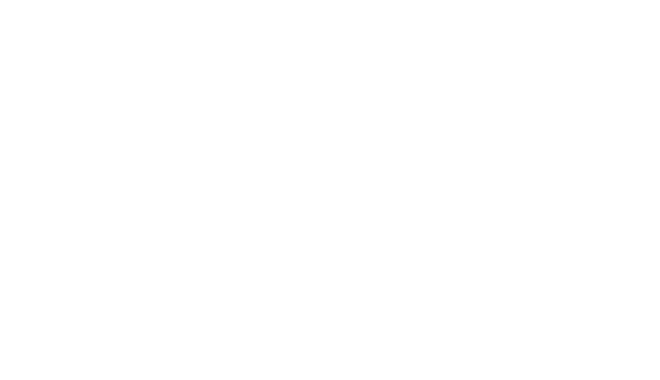

In [17]:
# deeplabcut.evaluate_network(config_path,Shuffles=[1], plotting=True)

In [2]:
# import os
# from deeplabcut.utils.auxfun_videos import VideoWriter
# video_path = r"./"
# _, ext = os.path.splitext(video_path)
# vid = VideoWriter(video_path)
# # clips = vid.split(n_splits=10)
# vid.shorten(start="00:00:00", end="00:00:10")

# # ffmpeg -i "path_to_video" -c:v h264 -crf 18 -preset fast "output_path"

'C:\\Users\\PC5\\Downloads\\00f4af0cf0a43159short.MOV'

In [10]:
# change snapshotindex to select the best network
deeplabcut.analyze_videos(config_path, [r"D:\Sang\y79-e8c66d-2024-06-20\videos\e8c66d5e68d4f16e_scaled.MOV"], save_as_csv=True)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6]],
 'all_joints_names': ['pellet',
                      'nosetip',
                      'right finger',
                      'right palm',
                      'right thumb',
                      'right elbow',
                      'left finger'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_y79Jun20\\y79_e8c66d95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'c:\\Users\\mice\\.conda\\envs\\deeplabcut\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\mobilenet_v2_1.0_224.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'mobilenet

Using snapshot-10000 for model D:\Sang\y79-e8c66d-2024-06-20\dlc-models\iteration-0\y79Jun20-trainset95shuffle1
Starting to analyze %  D:\Sang\y79-e8c66d-2024-06-20\videos\e8c66d5e68d4f16e_scaled.MOV
Loading  D:\Sang\y79-e8c66d-2024-06-20\videos\e8c66d5e68d4f16e_scaled.MOV
Duration of video [s]:  929.38 , recorded with  240.0 fps!
Overall # of frames:  223050  found with (before cropping) frame dimensions:  640 360
Starting to extract posture


100%|██████████| 223050/223050 [27:04<00:00, 137.30it/s] 


Saving results in D:\Sang\y79-e8c66d-2024-06-20\videos...
Saving csv poses!


c:\Users\mice\.conda\envs\deeplabcut\lib\site-packages\deeplabcut\utils\auxiliaryfunctions.py:402: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  DataMachine.to_hdf(dataname, "df_with_missing", format="table", mode="w")


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_mobnet_100_y79Jun20shuffle1_10000'

In [11]:
deeplabcut.create_labeled_video(config_path, [r"D:\Sang\y79-e8c66d-2024-06-20\videos\e8c66d5e68d4f16e_scaled.MOV"], save_frames = False)

Starting to process video: D:\Sang\y79-e8c66d-2024-06-20\videos\e8c66d5e68d4f16e_scaled.MOV
Loading D:\Sang\y79-e8c66d-2024-06-20\videos\e8c66d5e68d4f16e_scaled.MOV and data.
Duration of video [s]: 929.38, recorded with 240 fps!
Overall # of frames: 223050 with cropped frame dimensions: 640 360
Generating frames and creating video.


100%|██████████| 223050/223050 [12:45<00:00, 291.50it/s]


[True]